In [1]:
# # Unit 6 | Assignment - What's the Weather Like?

# ## WeatherPy

# In this example, you'll be creating a Python script 
# to visualize the weather of 500+ cities across the world of
# varying distance from the equator.To accomplish this, 
# you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), 
# the [OpenWeatherMap API](https://openweathermap.org/api), 
# and a little common sense to create a representative model of weather across world cities.

# Your objective is to build a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save both a CSV of all data retrieved and png images for each scatter plot.

# As final considerations:

# * You must complete your analysis using a Jupyter notebook.
# * You must use the Matplotlib or Pandas plotting libraries.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
# * See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

# ## Hints and Considerations

# * You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

# * Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

# * A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

# * Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

# * In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

# * Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
cities=[]
rand_lat_lngs=[]

rand_lat= np.linspace(-90,90,num=5000)
rand_lng= np.linspace(-180,180,num=5000)

latt=np.random.uniform(rand_lat)
lngg=np.random.uniform(rand_lng)

rand_lat_lngs=zip(latt,lngg)

for rand_lat_lng in rand_lat_lngs:
    city = citipy.nearest_city(rand_lat_lng[0], rand_lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pprint(cities)


['puerto ayora',
 'cidreira',
 'chuy',
 'rikitea',
 'atuona',
 'lebu',
 'ushuaia',
 'hermanus',
 'cape town',
 'punta arenas',
 'mataura',
 'jamestown',
 'georgetown',
 'castro',
 'avarua',
 'san luis',
 'marcona',
 'vaini',
 'coquimbo',
 'avera',
 'cacapava do sul',
 'pisco',
 'mancio lima',
 'san cristobal',
 'ilheus',
 'samalaeulu',
 'sao joao da barra',
 'conde',
 'vila velha',
 'mar del plata',
 'toamua',
 'tautira',
 'alofi',
 'arraial do cabo',
 'samusu',
 'coihaique',
 'tamandare',
 'pitimbu',
 'tapaua',
 'urucui',
 'caravelas',
 'itarema',
 'novo aripuana',
 'san matias',
 'touros',
 'laguna',
 'filadelfia',
 'san rafael',
 'taltal',
 'faanui',
 'vilhena',
 'saldanha',
 'salinas',
 'imbituba',
 'senador jose porfirio',
 'parana',
 'rondonopolis',
 'caapucu',
 'diamantino',
 'lima',
 'rawson',
 'puerto quijarro',
 'sao borja',
 'fare',
 'treinta y tres',
 'aquiraz',
 'axim',
 'chicama',
 'mazagao',
 'tiarei',
 'ancud',
 'comodoro rivadavia',
 'viedma',
 'haapiti',
 'tucuman',
 

In [4]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Loop through the list of cities and perform a request for data on each

latss = []
longss = []
humidity = []
tempature=[]
cloud = []
wind = []
cities_list = []
country_list = []
id_list = []
cloud_percent = []
for city in cities:
    response = requests.get(query_url + city).json()
    pprint(response)
    if response["cod"] != "404":
        latss.append(response['coord']['lat'])
        longss.append(response['coord']['lon'])
        humidity.append(response["main"]["humidity"])
        tempature.append(response["main"]["temp"])
        cloud.append(response['weather'][0]['description'])
        wind.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        id_list.append(response["id"])
        cloud_percent.append(response["clouds"]["all"])
    

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.74, 'lon': -90.35},
 'dt': 1537315200,
 'id': 3652764,
 'main': {'humidity': 73,
          'pressure': 1009,
          'temp': 71.6,
          'temp_max': 71.6,
          'temp_min': 71.6},
 'name': 'Puerto Ayora',
 'sys': {'country': 'EC',
         'id': 4355,
         'message': 0.0121,
         'sunrise': 1537357916,
         'sunset': 1537401497,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.17, 'lon': -50.22},
 'dt': 1537320734,
 'id': 3466165,
 'main': {'grnd_level': 1013.15,
          'humidity': 92,
          'pressure': 1013.15,
          'sea_level': 1023.24,
          'temp': 58.19,
          'temp_max': 58.19,
          'temp_min': 58.19},
 'name': 'Cidre

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -42.48, 'lon': -73.76},
 'dt': 1537320736,
 'id': 3896218,
 'main': {'grnd_level': 1008.29,
          'humidity': 100,
          'pressure': 1008.29,
          'sea_level': 1023.24,
          'temp': 44.78,
          'temp_max': 44.78,
          'temp_min': 44.78},
 'name': 'Castro',
 'rain': {'3h': 1.285},
 'sys': {'country': 'CL',
         'message': 0.0391,
         'sunrise': 1537354164,
         'sunset': 1537397330},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 319.501, 'speed': 3.18}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1537318800,
 'id': 4035715,
 'main': {'humidity': 64,
          'pressure': 1015,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Avarua',
 'sys': {'country': 'CK',
         '

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -46.43, 'lon': -67.52},
 'dt': 1537320739,
 'id': 3863379,
 'main': {'grnd_level': 995.81,
          'humidity': 84,
          'pressure': 995.81,
          'sea_level': 1017.24,
          'temp': 45.5,
          'temp_max': 45.5,
          'temp_min': 45.5},
 'name': 'Mar del Plata',
 'rain': {'3h': 0.33},
 'sys': {'country': 'AR',
         'message': 0.003,
         'sunrise': 1537352694,
         'sunset': 1537395811},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 216.001, 'speed': 1.61}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -17.73, 'lon': -149.15},
 'dt': 1537319280,
 'id': 4033557,
 'main': {'humidity': 74,
          'pressure': 1010,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Ta

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': -110.01},
 'dt': 1537320743,
 'id': 4013704,
 'main': {'grnd_level': 1001.72,
          'humidity': 95,
          'pressure': 1001.72,
          'sea_level': 1022.59,
          'temp': 76.19,
          'temp_max': 76.19,
          'temp_min': 76.19},
 'name': 'Laguna',
 'sys': {'country': 'MX',
         'message': 0.0034,
         'sunrise': 1537362435,
         'sunset': 1537406387},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 57.5011, 'speed': 1.83}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -22.35, 'lon': -60.04},
 'dt': 1537320744,
 'id': 3867291,
 'main': {'grnd_level': 1005.53,
          'humidity': 91,
          'pressure': 1005.53,
          'sea_level': 1019.63,
          'temp': 73.94,
          'temp_max': 73.94,
          'temp_min': 73.94},
 '

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -14.4, 'lon': -56.44},
 'dt': 1537320747,
 'id': 3464724,
 'main': {'grnd_level': 979.67,
          'humidity': 86,
          'pressure': 979.67,
          'sea_level': 1022.96,
          'temp': 73.85,
          'temp_max': 73.85,
          'temp_min': 73.85},
 'name': 'Diamantino',
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1537349855,
         'sunset': 1537393296},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 37.0011, 'speed': 2.62}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -12.06, 'lon': -77.04},
 'dt': 1537320481,
 'id': 3936456,
 'main': {'grnd_level': 876.43,
          'humidity': 64,
          'pressure': 876.43,
          'sea_level': 1024.43,
          'temp': 61.4,
          'temp_max': 61.4,
          'temp_min': 61.4},
 'name': 'Lima

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': -67.48},
 'dt': 1537318800,
 'id': 3860443,
 'main': {'humidity': 93,
          'pressure': 1006,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Comodoro Rivadavia',
 'sys': {'country': 'AR',
         'id': 4741,
         'message': 0.0033,
         'sunrise': 1537352681,
         'sunset': 1537395804,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09n',
              'id': 300,
              'main': 'Drizzle'}],
 'wind': {'deg': 191.001, 'speed': 8.43}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -40.81, 'lon': -62.99},
 'dt': 1537320749,
 'id': 3832899,
 'main': {'grnd_level': 1008.94,
          'humidity': 99,
          'pressure': 1008.94,
          'sea_level': 1012.62,
          'temp': 48.74,
          'temp_max': 48.74,
          'temp_min'

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -35.97, 'lon': -72.32},
 'dt': 1537320751,
 'id': 3896105,
 'main': {'grnd_level': 1009.18,
          'humidity': 97,
          'pressure': 1009.18,
          'sea_level': 1032.2,
          'temp': 49.64,
          'temp_max': 49.64,
          'temp_min': 49.64},
 'name': 'Cauquenes',
 'rain': {'3h': 0.515},
 'sys': {'country': 'CL',
         'message': 0.0037,
         'sunrise': 1537353780,
         'sunset': 1537397014},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 294.501, 'speed': 7.2}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -11.1, 'lon': -77.61},
 'dt': 1537320751,
 'id': 3939761,
 'main': {'grnd_level': 985.67,
          'humidity': 94,
          'pressure': 985.67,
          'sea_level': 1025.27,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -36.62, 'lon': -64.29},
 'dt': 1537320756,
 'id': 3835994,
 'main': {'grnd_level': 1002.86,
          'humidity': 73,
          'pressure': 1002.86,
          'sea_level': 1021.5,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Santa Rosa',
 'sys': {'country': 'AR',
         'message': 0.0065,
         'sunrise': 1537351858,
         'sunset': 1537395083},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 243.501, 'speed': 8.99}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -14.61, 'lon': -41.14},
 'dt': 1537318800,
 'id': 3472298,
 'main': {'humidity': 77,
          'pressure': 1019,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Anage',
 'sys': {'country': 'BR',
         'id': 4561,
         'message': 0.00

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -9.52, 'lon': -37.19},
 'dt': 1537320759,
 'id': 3393525,
 'main': {'grnd_level': 1000.99,
          'humidity': 80,
          'pressure': 1000.99,
          'sea_level': 1027.37,
          'temp': 72.32,
          'temp_max': 72.32,
          'temp_min': 72.32},
 'name': 'Olivenca',
 'sys': {'country': 'BR',
         'message': 0.0034,
         'sunrise': 1537345211,
         'sunset': 1537388699},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 94.0011, 'speed': 8.32}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.48, 'lon': -54.34},
 'dt': 1537320759,
 'id': 3440777,
 'main': {'grnd_level': 1003.26,
          'humidity': 95,
          'pressure': 1003.26,
          'sea_level': 1020.04,
          'temp': 62.69,
          'temp_max': 62.69,
          'temp_min': 62.69},
 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -51.62, 'lon': -69.22},
 'dt': 1537318800,
 'id': 3838859,
 'main': {'humidity': 80,
          'pressure': 1010,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Rio Gallegos',
 'sys': {'country': 'AR',
         'id': 4753,
         'message': 0.0147,
         'sunrise': 1537353140,
         'sunset': 1537396191,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -6.53, 'lon': -64.38},
 'dt': 1537320762,
 'id': 3664716,
 'main': {'grnd_level': 1011.45,
          'humidity': 80,
          'pressure': 1011.45,
          'sea_level': 1020.4,
          'temp': 81.68,
          'temp_max': 81.68,
          'temp_min': 81.68},
 'name': 'Canut

          'sea_level': 1027.13,
          'temp': 63.59,
          'temp_max': 63.59,
          'temp_min': 63.59},
 'name': 'Sao Fidelis',
 'sys': {'country': 'BR',
         'message': 0.0067,
         'sunrise': 1537346370,
         'sunset': 1537389738},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 304.001, 'speed': 2.39}}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -5.81, 'lon': -35.21},
 'dt': 1537318800,
 'id': 3394023,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Natal',
 'sys': {'country': 'BR',
         'id': 4546,
         'message': 0.003,
         'sunrise': 1537344715,
         'sunset': 1537388241,
         'type': 1},
 'visibility': 10000,
 'weather': [{'descr

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -0.19, 'lon': -74.78},
 'dt': 1537320768,
 'id': 3671437,
 'main': {'grnd_level': 1001.89,
          'humidity': 96,
          'pressure': 1001.89,
          'sea_level': 1022.55,
          'temp': 76.82,
          'temp_max': 76.82,
          'temp_min': 76.82},
 'name': 'Puerto Leguizamo',
 'sys': {'country': 'CO',
         'message': 0.0045,
         'sunrise': 1537354177,
         'sunset': 1537397764},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 54.0011, 'speed': 1.95}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -15.89, 'lon': -52.26},
 'dt': 1537320768,
 'id': 3470709,
 'main': {'grnd_level': 977.89,
          'humidity': 82,
          'pressure': 977.89,
          'sea_level': 1024.82,
          'temp': 72.5,
          'temp_max': 72.5,
          'temp_min': 72.5},

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -8.84, 'lon': -69.26},
 'dt': 1537320771,
 'id': 3663495,
 'main': {'grnd_level': 1000.59,
          'humidity': 91,
          'pressure': 1000.59,
          'sea_level': 1020.93,
          'temp': 75.65,
          'temp_max': 75.65,
          'temp_min': 75.65},
 'name': 'Manoel Urbano',
 'sys': {'country': 'BR',
         'message': 0.0033,
         'sunrise': 1537352901,
         'sunset': 1537396398},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 293.001, 'speed': 2.06}}
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -12.59, 'lon': -69.19},
 'dt': 1537320771,
 'id': 3931470,
 'main': {'grnd_level': 997.51,
          'humidity': 95,
          'pressure': 997.51,
          'sea_level': 1021.78,
          'temp': 73.13,
          'temp_max': 73.13,
          'temp_min': 73.13},
 'na

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 14.6, 'lon': 121.03},
 'dt': 1537318800,
 'id': 1692193,
 'main': {'humidity': 70,
          'pressure': 1010,
          'temp': 86,
          'temp_max': 86,
          'temp_min': 86},
 'name': 'San Juan',
 'sys': {'country': 'PH',
         'id': 7706,
         'message': 0.0039,
         'sunrise': 1537307086,
         'sunset': 1537350876,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -26.65, 'lon': 15.16},
 'dt': 1537320774,
 'id': 3355672,
 'main': {'grnd_level': 1020.85,
          'humidity': 89,
          'pressure': 1020.85,
          'sea_level': 1035.56,
          'temp': 55.22,
          'temp_max': 55.22,
          'temp_min': 55.22},
 'name': 'Luderitz',
 'sys

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -0.72, 'lon': 8.78},
 'dt': 1537320776,
 'id': 2396518,
 'main': {'grnd_level': 1024.5,
          'humidity': 98,
          'pressure': 1024.5,
          'sea_level': 1024.86,
          'temp': 76.55,
          'temp_max': 76.55,
          'temp_min': 76.55},
 'name': 'Port-Gentil',
 'sys': {'country': 'GA',
         'message': 0.0031,
         'sunrise': 1537334131,
         'sunset': 1537377711},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 197.501, 'speed': 9.78}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -1.75, 'lon': -47.06},
 'dt': 1537320777,
 'id': 3403127,
 'main': {'grnd_level': 1020.93,
          'humidity': 88,
          'pressure': 1020.93,
          'sea_level': 1025.63,
          'temp': 75.83,
          'temp_max': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.3, 'lon': -57.63},
 'dt': 1537318800,
 'id': 3439389,
 'main': {'humidity': 88,
          'pressure': 1006,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Asuncion',
 'sys': {'country': 'PY',
         'id': 4608,
         'message': 0.0032,
         'sunrise': 1537350198,
         'sunset': 1537393534,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40.0041, 'speed': 5.99}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -6.57, 'lon': -76.13},
 'dt': 1537318800,
 'id': 3698414,
 'main': {'humidity': 290,
          'pressure': 1008,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Chazuta',
 'sys': {'country': 'PE',
         'id': 4406,
         'message': 0.0042,


{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -2.58, 'lon': -49.5},
 'dt': 1537320782,
 'id': 3394745,
 'main': {'grnd_level': 1019.8,
          'humidity': 95,
          'pressure': 1019.8,
          'sea_level': 1025.31,
          'temp': 75.47,
          'temp_max': 75.47,
          'temp_min': 75.47},
 'name': 'Mocajuba',
 'sys': {'country': 'BR',
         'message': 0.0033,
         'sunrise': 1537348125,
         'sunset': 1537391686},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 52.5011, 'speed': 3.96}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -11.02, 'lon': -68.77},
 'dt': 1537320783,
 'id': 3919998,
 'main': {'grnd_level': 990.29,
          'humidity': 78,
          'pressure': 990.29,
          'sea_level': 1021.17,
          'temp': 79.97,
          'temp_max': 79.97,
          'temp_min': 79.97},
 'name

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -4.58, 'lon': -81.27},
 'dt': 1537320785,
 'id': 3691582,
 'main': {'grnd_level': 1009.34,
          'humidity': 84,
          'pressure': 1009.34,
          'sea_level': 1024.42,
          'temp': 65.57,
          'temp_max': 65.57,
          'temp_min': 65.57},
 'name': 'Talara',
 'sys': {'country': 'PE',
         'message': 0.0033,
         'sunrise': 1537355759,
         'sunset': 1537399300},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 181.001, 'speed': 7.76}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.97, 'lon': -122.03},
 'dt': 1537318560,
 'id': 5393052,
 'main': {'humidity': 77,
          'pressure': 1013,
          'temp': 62.83,
          'temp_max': 71.6,
          'temp_min': 55.94},
 'name': 'Santa Cruz',
 'sys': {'country': 'US',
         'id': 512,
         'mes

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.19, 'lon': -58.17},
 'dt': 1537318800,
 'id': 3433899,
 'main': {'humidity': 82,
          'pressure': 1005,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Formosa',
 'sys': {'country': 'AR',
         'id': 4723,
         'message': 0.0034,
         'sunrise': 1537350333,
         'sunset': 1537393660,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.78, 'lon': -48.65},
 'dt': 1537318800,
 'id': 3454213,
 'main': {'humidity': 93,
          'pressure': 1010,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Penha',
 'sys': {'country': 'BR',
         'id': 4544,
         'message': 0.0031,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': -57.76},
 'dt': 1537320791,
 'id': 3397763,
 'main': {'grnd_level': 1011.37,
          'humidity': 91,
          'pressure': 1011.37,
          'sea_level': 1022.31,
          'temp': 76.46,
          'temp_max': 76.46,
          'temp_min': 76.46},
 'name': 'Jacareacanga',
 'sys': {'country': 'BR',
         'message': 0.0036,
         'sunrise': 1537350127,
         'sunset': 1537393651},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 163.501, 'speed': 1.95}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -39.03, 'lon': -67.58},
 'dt': 1537318800,
 'id': 3855065,
 'main': {'humidity': 58,
          'pressure': 1008,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'General Roca',
 'sys': {'country': 'AR',
         'id': 4769,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -1.95, 'lon': -54.74},
 'dt': 1537318800,
 'id': 3407980,
 'main': {'humidity': 94,
          'pressure': 1010,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Alenquer',
 'sys': {'country': 'BR',
         'id': 4574,
         'message': 0.0035,
         'sunrise': 1537349379,
         'sunset': 1537392947,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 78.5011, 'speed': 7.65}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -24.11, 'lon': -49.46},
 'dt': 1537320794,
 'id': 3447848,
 'main': {'grnd_level': 941.9,
          'humidity': 93,
          'pressure': 941.9,
          'sea_level': 1025.43,
          'temp': 58.73,
          'temp_max': 58.73,
          'temp

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.21, 'lon': -8.63},
 'dt': 1537318800,
 'id': 2271926,
 'main': {'humidity': 88,
          'pressure': 1019,
          'temp': 63.5,
          'temp_max': 64.4,
          'temp_min': 62.6},
 'name': 'Almeirim',
 'sys': {'country': 'PT',
         'id': 5961,
         'message': 0.0162,
         'sunrise': 1537337960,
         'sunset': 1537382197,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -27.6, 'lon': -48.55},
 'dt': 1537318800,
 'id': 3463237,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Florianopolis',
 'sys': {'country': 'BR',
         'id': 4493,
         'message': 0.0

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -21.13, 'lon': -56.49},
 'dt': 1537320799,
 'id': 3469294,
 'main': {'grnd_level': 984.13,
          'humidity': 92,
          'pressure': 984.13,
          'sea_level': 1022.39,
          'temp': 70.25,
          'temp_max': 70.25,
          'temp_min': 70.25},
 'name': 'Bonito',
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1537349903,
         'sunset': 1537393279},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 55.5011, 'speed': 4.74}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -3.29, 'lon': -45.17},
 'dt': 1537320799,
 'id': 3392368,
 'main': {'grnd_level': 1019.71,
          'humidity': 82,
          'pressure': 1019.71,
          'sea_level': 1024.94,
          'temp': 77.54,
          'temp_max': 77.54,
          'temp_min': 77.54},
 'name': 'Penal

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.67, 'lon': -1.07},
 'dt': 1537320801,
 'id': 2358100,
 'main': {'grnd_level': 990.94,
          'humidity': 90,
          'pressure': 990.94,
          'sea_level': 1022.75,
          'temp': 73.94,
          'temp_max': 73.94,
          'temp_min': 73.94},
 'name': 'Manga',
 'sys': {'country': 'BF',
         'message': 0.0039,
         'sunrise': 1537336413,
         'sunset': 1537380146},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 209.001, 'speed': 3.62}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -2.76, 'lon': -42.27},
 'dt': 1537320802,
 'id': 3385899,
 'main': {'grnd_level': 1022.47,
          'humidity': 80,
          'pressure': 1022.47,
          'sea_level': 1024.42,
          'temp': 79.34,
          'temp_max': 79.34,
          'temp_min': 79.34},
 'name': 'Tutoia',

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -1.82, 'lon': -44.87},
 'dt': 1537320804,
 'id': 3401148,
 'main': {'grnd_level': 1024.66,
          'humidity': 82,
          'pressure': 1024.66,
          'sea_level': 1025.67,
          'temp': 78.53,
          'temp_max': 78.53,
          'temp_min': 78.53},
 'name': 'Cururupu',
 'sys': {'country': 'BR',
         'message': 0.0036,
         'sunrise': 1537347010,
         'sunset': 1537390579},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 52.5011, 'speed': 7.65}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -24.09, 'lon': -57.2},
 'dt': 1537320804,
 'id': 3437021,
 'main': {'grnd_level': 1010.96,
          'humidity': 77,
          'pressure': 1010.96,
          'sea_level': 1021.42,
          'temp': 66.11,
          'temp_max': 66.11,
          'temp_min': 66.11},
 'name': 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -17.74, 'lon': -46.17},
 'dt': 1537320806,
 'id': 3459785,
 'main': {'grnd_level': 941.58,
          'humidity': 86,
          'pressure': 941.58,
          'sea_level': 1026.85,
          'temp': 68.45,
          'temp_max': 68.45,
          'temp_min': 68.45},
 'name': 'Joao Pinheiro',
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1537347410,
         'sunset': 1537390816},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 141.501, 'speed': 4.63}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -16.26, 'lon': -56.62},
 'dt': 1537320806,
 'id': 3453315,
 'main': {'grnd_level': 1004.64,
          'humidity': 65,
          'pressure': 1004.64,
          'sea_level': 1022.07,
          'temp': 80.15,
          'temp_max': 80.15,
          'temp_min': 80.15}

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.89, 'lon': -56.84},
 'dt': 1537320809,
 'id': 3437868,
 'main': {'grnd_level': 1004.16,
          'humidity': 85,
          'pressure': 1004.16,
          'sea_level': 1021.58,
          'temp': 59.9,
          'temp_max': 59.9,
          'temp_min': 59.9},
 'name': 'La Colmena',
 'sys': {'country': 'PY',
         'message': 0.0035,
         'sunrise': 1537350012,
         'sunset': 1537393342},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 34.0011, 'speed': 2.28}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -13.79, 'lon': -47.46},
 'dt': 1537320809,
 'id': 3466594,
 'main': {'grnd_level': 926.34,
          'humidity': 61,
          'pressure': 926.34,
          'sea_level': 1024.09,
          'temp': 72.95,
          'temp_max': 72.95

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.67, 'lon': -48.51},
 'dt': 1537318800,
 'id': 3478424,
 'main': {'humidity': 93,
          'pressure': 1009,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Pontal do Parana',
 'sys': {'country': 'BR',
         'id': 4519,
         'message': 0.0042,
         'sunrise': 1537348013,
         'sunset': 1537391343,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -13.61, 'lon': -42.94},
 'dt': 1537320812,
 'id': 3451448,
 'main': {'grnd_level': 967.43,
          'humidity': 39,
          'pressure': 967.43,
          'sea_level': 1025.19,
          'temp': 77.72,
          'temp_max': 77.72,
          'temp_min': 77.72},
 'name': 'Riacho

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -7.06, 'lon': -36.37},
 'dt': 1537315200,
 'id': 3387258,
 'main': {'humidity': 83,
          'pressure': 1017,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Soledade',
 'sys': {'country': 'BR',
         'id': 4520,
         'message': 0.003,
         'sunrise': 1537345000,
         'sunset': 1537388514,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -7.84, 'lon': -38.1},
 'dt': 1537320815,
 'id': 3391172,
 'main': {'grnd_level': 958.52,
          'humidity': 53,
          'pressure': 958.52,
          'sea_level': 1025.55,
          'temp': 74.12,
          'temp_max': 74.12,
          'temp_min': 74.12},
 'name': 'Triunfo',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -7.58, 'lon': -40.5},
 'dt': 1537320817,
 'id': 3407243,
 'main': {'grnd_level': 957.3,
          'humidity': 32,
          'pressure': 957.3,
          'sea_level': 1024.01,
          'temp': 84.02,
          'temp_max': 84.02,
          'temp_min': 84.02},
 'name': 'Araripina',
 'sys': {'country': 'BR',
         'message': 0.0039,
         'sunrise': 1537345994,
         'sunset': 1537389502},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 99.0011, 'speed': 11.45}}
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -14.3, 'lon': -43.77},
 'dt': 1537320817,
 'id': 3466950,
 'main': {'grnd_level': 969.3,
          'humidity': 32,
          'pressure': 969.3,
          'sea_level': 1025.15,
          'temp': 81.77,
          'temp_max': 81.77,
          'temp_min': 81.77},
 'name': 'Carin

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 4.92, 'lon': 6.26},
 'dt': 1537320820,
 'id': 2318123,
 'main': {'grnd_level': 1008.21,
          'humidity': 94,
          'pressure': 1008.21,
          'sea_level': 1024.54,
          'temp': 75.47,
          'temp_max': 75.47,
          'temp_min': 75.47},
 'name': 'Yenagoa',
 'rain': {'3h': 0.18},
 'sys': {'country': 'NG',
         'message': 0.0033,
         'sunrise': 1537334700,
         'sunset': 1537378347},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 231.001, 'speed': 3.96}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 5.35, 'lon': -0.62},
 'dt': 1537318800,
 'id': 2294034,
 'main': {'humidity': 94,
          'pressure': 1012,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Winneba',
 'sys': {'country': 'GH',
         'id': 6247,
   

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 1.58, 'lon': 9.62},
 'dt': 1537315200,
 'id': 2308278,
 'main': {'humidity': 100,
          'pressure': 1012,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Mbini',
 'sys': {'country': 'GQ',
         'id': 6726,
         'message': 0.0033,
         'sunrise': 1537333915,
         'sunset': 1537377522,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 242.001, 'speed': 3.85}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 4.73, 'lon': 6.86},
 'dt': 1537318800,
 'id': 2324433,
 'main': {'humidity': 94,
          'pressure': 1011,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Bugama',
 'sys': {'country': 'NG',
       

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 5.49, 'lon': 9.85},
 'dt': 1537320824,
 'id': 2231564,
 'main': {'grnd_level': 890.27,
          'humidity': 99,
          'pressure': 890.27,
          'sea_level': 1024.74,
          'temp': 65.39,
          'temp_max': 65.39,
          'temp_min': 65.39},
 'name': 'Fontem',
 'rain': {'3h': 0.25},
 'sys': {'country': 'CM',
         'message': 0.0035,
         'sunrise': 1537333834,
         'sunset': 1537377489},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 196.501, 'speed': 0.38}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 1.87, 'lon': 10.77},
 'dt': 1537320824,
 'id': 2310309,
 'main': {'grnd_level': 973.19,
          'humidity': 99,
          'pressure': 973.19,
          'sea_level': 1024.9,
          'temp': 70.79,
          'temp_max': 70.79,
          'temp_min': 70.79},

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 7.37, 'lon': 7.63},
 'dt': 1537320651,
 'id': 2349788,
 'main': {'grnd_level': 1004.24,
          'humidity': 98,
          'pressure': 1004.24,
          'sea_level': 1024.7,
          'temp': 72.05,
          'temp_max': 72.05,
          'temp_min': 72.05},
 'name': 'Ankpa',
 'sys': {'country': 'NG',
         'message': 0.0034,
         'sunrise': 1537334355,
         'sunset': 1537378033},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 194.001, 'speed': 3.29}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 7.87, 'lon': 9.78},
 'dt': 1537320827,
 'id': 2318921,
 'main': {'grnd_level': 1007.32,
          'humidity': 97,
          'pressure': 1007.32,
          'sea_level': 1024.66,
          'temp': 72.5,
          'temp_max': 72.5,
 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 8.48, 'lon': 13.24},
 'dt': 1537320829,
 'id': 2222539,
 'main': {'grnd_level': 968.41,
          'humidity': 99,
          'pressure': 968.41,
          'sea_level': 1024.82,
          'temp': 67.64,
          'temp_max': 67.64,
          'temp_min': 67.64},
 'name': 'Poli',
 'rain': {'3h': 12.825},
 'sys': {'country': 'CM',
         'message': 0.004,
         'sunrise': 1537333001,
         'sunset': 1537376693},
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10n',
              'id': 502,
              'main': 'Rain'}],
 'wind': {'deg': 239.501, 'speed': 2.84}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 6.41, 'lon': 1.88},
 'dt': 1537318800,
 'id': 2394824,
 'main': {'humidity': 88,
          'pressure': 1012,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Come',
 'sys': {'country': 'BJ',
         'id': 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 1.51, 'lon': 21.07},
 'dt': 1537320832,
 'id': 218229,
 'main': {'grnd_level': 976.27,
          'humidity': 96,
          'pressure': 976.27,
          'sea_level': 1023.04,
          'temp': 72.5,
          'temp_max': 72.5,
          'temp_min': 72.5},
 'name': 'Bongandanga',
 'sys': {'country': 'CD',
         'message': 0.038,
         'sunrise': 1537331168,
         'sunset': 1537374775},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 347.001, 'speed': 2.17}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 10.11, 'lon': 14.45},
 'dt': 1537320832,
 'id': 2230599,
 'main': {'grnd_level': 977.81,
          'humidity': 96,
          'pressure': 977.81,
          'sea_level': 1023.12,
          'temp': 69.98,
          'temp_max': 69.98,
          'temp_min': 69.98},
 'name': 'Ka

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 4.96, 'lon': 18.7},
 'dt': 1537318800,
 'id': 2387435,
 'main': {'humidity': 100,
          'pressure': 1010,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Damara',
 'sys': {'country': 'CF',
         'id': 6714,
         'message': 0.0028,
         'sunrise': 1537331714,
         'sunset': 1537375363,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 8.85, 'lon': 5.42},
 'dt': 1537320732,
 'id': 2332504,
 'main': {'grnd_level': 1008.69,
          'humidity': 97,
          'pressure': 1008.69,
          'sea_level': 1024.09,
          'temp': 70.61,
          'temp_max': 70.61,
          'temp_min': 70.61},
 'name': 'Lafiagi',
 'sys': {'country': 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 7.69, 'lon': 18.62},
 'dt': 1537320838,
 'id': 2386042,
 'main': {'grnd_level': 977.89,
          'humidity': 99,
          'pressure': 977.89,
          'sea_level': 1023.32,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Kabo',
 'rain': {'3h': 3.3},
 'sys': {'country': 'CF',
         'message': 0.0028,
         'sunrise': 1537331715,
         'sunset': 1537375398},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 184.001, 'speed': 8.77}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 8.07, 'lon': 22.4},
 'dt': 1537320839,
 'id': 236901,
 'main': {'grnd_level': 947.66,
          'humidity': 98,
          'pressure': 947.66,
          'sea_level': 1023.36,
          'temp': 66.29,
          'temp_max': 66.29,
          'temp_min': 66.29},
 '

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 3.65, 'lon': 10.77},
 'dt': 1537320843,
 'id': 2231881,
 'main': {'grnd_level': 983.97,
          'humidity': 97,
          'pressure': 983.97,
          'sea_level': 1024.7,
          'temp': 72.95,
          'temp_max': 72.95,
          'temp_min': 72.95},
 'name': 'Eseka',
 'rain': {'3h': 0.41},
 'sys': {'country': 'CM',
         'message': 0.0036,
         'sunrise': 1537333626,
         'sunset': 1537377258},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 251.001, 'speed': 3.18}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 4.74, 'lon': 11.22},
 'dt': 1537320844,
 'id': 2235194,
 'main': {'grnd_level': 961.84,
          'humidity': 95,
          'pressure': 961.84,
          'sea_level': 1024.33,
          'temp': 71.87,
          'temp_max': 71.87,
          'temp_min': 71.87},

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 5.04, 'lon': 21.21},
 'dt': 1537320846,
 'id': 240999,
 'main': {'grnd_level': 965.89,
          'humidity': 98,
          'pressure': 965.89,
          'sea_level': 1023.16,
          'temp': 69.44,
          'temp_max': 69.44,
          'temp_min': 69.44},
 'name': 'Alindao',
 'sys': {'country': 'CF',
         'message': 0.0033,
         'sunrise': 1537331111,
         'sunset': 1537374761},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 33.5011, 'speed': 3.29}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 5.18, 'lon': 7.71},
 'dt': 1537320846,
 'id': 2338106,
 'main': {'grnd_level': 1008.69,
          'humidity': 99,
          'pressure': 1008.69,
          'sea_level': 1024.58,
          'temp': 70.79,
          'temp_max': 70.79,
          'temp_min': 70.79},
 'name': 'Ikot

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 13.83, 'lon': 20.83},
 'dt': 1537320850,
 'id': 245785,
 'main': {'grnd_level': 951.79,
          'humidity': 43,
          'pressure': 951.79,
          'sea_level': 1020.65,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Abeche',
 'sys': {'country': 'TD',
         'message': 0.0035,
         'sunrise': 1537331141,
         'sunset': 1537374906},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 158.501, 'speed': 5.41}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 11.84, 'lon': 13.15},
 'dt': 1537320850,
 'id': 2331447,
 'main': {'grnd_level': 987.29,
          'humidity': 90,
          'pressure': 987.29,
          'sea_level': 1021.94,
          'temp': 71.24,
          'temp_max': 71.24,
  

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 11.01, 'lon': 29.72},
 'dt': 1537320852,
 'id': 373141,
 'main': {'grnd_level': 961.68,
          'humidity': 97,
          'pressure': 961.68,
          'sea_level': 1021.94,
          'temp': 69.98,
          'temp_max': 69.98,
          'temp_min': 69.98},
 'name': 'Kaduqli',
 'sys': {'country': 'SD',
         'message': 0.0036,
         'sunrise': 1537329028,
         'sunset': 1537372755},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 65.0011, 'speed': 2.17}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.87, 'lon': 11.04},
 'dt': 1537320852,
 'id': 2341656,
 'main': {'grnd_level': 985.51,
          'humidity': 87,
          'pressure': 985.51,
          'sea_level': 1022.43,
          'temp': 72.14,
          'temp_max': 72.14,
          'temp_min': 72.14},
 'name': 'Gashua'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.07, 'lon': 5.96},
 'dt': 1537320857,
 'id': 2441530,
 'main': {'grnd_level': 986.16,
          'humidity': 92,
          'pressure': 986.16,
          'sea_level': 1022.96,
          'temp': 73.31,
          'temp_max': 73.31,
          'temp_min': 73.31},
 'name': 'Madaoua',
 'sys': {'country': 'NE',
         'message': 0.0417,
         'sunrise': 1537334708,
         'sunset': 1537378475},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 192.001, 'speed': 6.31}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 7.37, 'lon': 12.65},
 'dt': 1537320857,
 'id': 2221513,
 'main': {'grnd_level': 898.78,
          'humidity': 98,
          'pressure': 898.78,
          'sea_level': 1025.43,
          'temp': 61.97,
          'temp_max': 61.97,
          'temp_min': 61.97},
 'name': 'Tignere',


{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 10.4, 'lon': 14.44},
 'dt': 1537320860,
 'id': 2226641,
 'main': {'grnd_level': 977.81,
          'humidity': 96,
          'pressure': 977.81,
          'sea_level': 1023.12,
          'temp': 69.98,
          'temp_max': 69.98,
          'temp_min': 69.98},
 'name': 'Mindif',
 'sys': {'country': 'CM',
         'message': 0.0037,
         'sunrise': 1537332700,
         'sunset': 1537376417},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 213.001, 'speed': 7.76}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.04, 'lon': 8.32},
 'dt': 1537320860,
 'id': 2345094,
 'main': {'grnd_level': 971.33,
          'humidity': 84,
          'pressure': 971.33,
          'sea_level': 1022.79,
          'temp': 71.24,
          'temp_max': 71.24,
          'temp_min': 71.24},
 'name': 'Daura'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 57.82, 'lon': 26.93},
 'dt': 1537318200,
 'id': 587450,
 'main': {'humidity': 63,
          'pressure': 1011,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Juba',
 'sys': {'country': 'EE',
         'id': 5015,
         'message': 0.004,
         'sunrise': 1537329024,
         'sunset': 1537374030,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.26, 'lon': 37.49},
 'dt': 1537320862,
 'id': 345353,
 'main': {'grnd_level': 807.91,
          'humidity': 88,
          'pressure': 807.91,
          'sea_level': 1023.81,
          'temp': 50.36,
          'temp_max': 50.36,
          'temp_min': 50.36},
 'name': 'Adet',
 'sys': {'country

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 3.51, 'lon': 34.14},
 'dt': 1537320865,
 'id': 233093,
 'main': {'grnd_level': 874.05,
          'humidity': 87,
          'pressure': 874.05,
          'sea_level': 1024.82,
          'temp': 52.07,
          'temp_max': 52.07,
          'temp_min': 52.07},
 'name': 'Kaabong',
 'sys': {'country': 'UG',
         'message': 0.0041,
         'sunrise': 1537328019,
         'sunset': 1537371650},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 83.5011, 'speed': 1.83}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 3.12, 'lon': 35.6},
 'dt': 1537320865,
 'id': 189280,
 'main': {'grnd_level': 952.2,
          'humidity': 66,
          'pressure': 952.2,
          'sea_level': 1024.42,
          'temp': 69.98,
          'temp_max': 69.98,
          't

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.89, 'lon': 5.26},
 'dt': 1537320867,
 'id': 2439376,
 'main': {'grnd_level': 974.73,
          'humidity': 78,
          'pressure': 974.73,
          'sea_level': 1022.23,
          'temp': 74.57,
          'temp_max': 74.57,
          'temp_min': 74.57},
 'name': 'Tahoua',
 'sys': {'country': 'NE',
         'message': 0.0042,
         'sunrise': 1537334870,
         'sunset': 1537378648},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 173.501, 'speed': 8.43}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 6.99, 'lon': 35.58},
 'dt': 1537320867,
 'id': 330534,
 'main': {'grnd_level': 870.41,
          'humidity': 97,
          'pressure': 870.41,
          'sea_level': 1025.27,
          'temp': 60.44,
          'temp_max': 60.44,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 3.94, 'lon': 41.86},
 'dt': 1537320870,
 'id': 187896,
 'main': {'grnd_level': 1001.56,
          'humidity': 59,
          'pressure': 1001.56,
          'sea_level': 1027.09,
          'temp': 74.12,
          'temp_max': 74.12,
          'temp_min': 74.12},
 'name': 'Mandera',
 'sys': {'country': 'ET',
         'message': 0.0137,
         'sunrise': 1537326163,
         'sunset': 1537369800},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 183.501, 'speed': 9.44}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 13.93, 'lon': 41.69},
 'dt': 1537320870,
 'id': 338345,
 'main': {'grnd_level': 978.95,
          'humidity': 57,
          'pressure': 978.95,
          'sea_level': 1021.7,
          'temp': 72.5,
          'temp_max': 72.5,
          'temp_min': 72.5},
 'name': 'Edd',
 'sys': 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 8.99, 'lon': 40.17},
 'dt': 1537320873,
 'id': 343134,
 'main': {'grnd_level': 901.78,
          'humidity': 94,
          'pressure': 901.78,
          'sea_level': 1025.75,
          'temp': 58.55,
          'temp_max': 58.55,
          'temp_min': 58.55},
 'name': 'Awash',
 'rain': {'3h': 1.82},
 'sys': {'country': 'ET',
         'message': 0.0096,
         'sunrise': 1537326535,
         'sunset': 1537370236},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 189.001, 'speed': 2.62}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': 42.5},
 'dt': 1537318800,
 'id': 110690,
 'main': {'humidity': 68,
          'pressure': 1024,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Abha',
 'sys': 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 9.5, 'lon': 35.5},
 'dt': 1537320876,
 'id': 330120,
 'main': {'grnd_level': 854.28,
          'humidity': 97,
          'pressure': 854.28,
          'sea_level': 1024.9,
          'temp': 60.08,
          'temp_max': 60.08,
          'temp_min': 60.08},
 'name': 'NEDJO',
 'rain': {'3h': 3.045},
 'sys': {'country': 'ET',
         'message': 0.0036,
         'sunrise': 1537327652,
         'sunset': 1537371359},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 167.001, 'speed': 3.4}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 8.41, 'lon': 48.48},
 'dt': 1537320876,
 'id': 58933,
 'main': {'grnd_level': 970.6,
          'humidity': 55,
          'pressure': 970.6,
          'sea_level': 1025.43,
          'temp': 78.62,
          'temp_max': 78.62,
          'temp_min': 78.62},
 'n

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.31, 'lon': 13.39},
 'dt': 1537315200,
 'id': 2231320,
 'main': {'humidity': 94,
          'pressure': 1011,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Garoua',
 'sys': {'country': 'CM',
         'id': 6753,
         'message': 0.0033,
         'sunrise': 1537332959,
         'sunset': 1537376662,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230.501, 'speed': 4.74}}
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 10.34, 'lon': 15.23},
 'dt': 1537320879,
 'id': 2221030,
 'main': {'grnd_level': 984.21,
          'humidity': 96,
          'pressure': 984.21,
          'sea_level': 1023.04,
          'temp': 70.7,
    

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 17.41, 'lon': 121.44},
 'dt': 1537320883,
 'id': 1684803,
 'main': {'grnd_level': 931.77,
          'humidity': 83,
          'pressure': 931.77,
          'sea_level': 1023.2,
          'temp': 78.17,
          'temp_max': 78.17,
          'temp_min': 78.17},
 'name': 'Tabuk',
 'sys': {'country': 'PH',
         'message': 0.0036,
         'sunrise': 1537306965,
         'sunset': 1537350798},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 37.5011, 'speed': 2.62}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 3.81, 'lon': 43.25},
 'dt': 1537320883,
 'id': 50814,
 'main': {'grnd_level': 983.08,
          'humidity': 82,
          'pressure': 983.08,
          'sea_level': 1027.46,
          'temp': 68.9,
          'temp_max': 68.9,
          'temp_min': 68.9},
 'name': 'Wajid',
 's

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.86, 'lon': 10.98},
 'dt': 1537320885,
 'id': 2214433,
 'main': {'grnd_level': 976.51,
          'humidity': 85,
          'pressure': 976.51,
          'sea_level': 1031.51,
          'temp': 64.85,
          'temp_max': 64.85,
          'temp_min': 64.85},
 'name': 'Nalut',
 'sys': {'country': 'LY',
         'message': 0.0193,
         'sunrise': 1537333342,
         'sunset': 1537377414},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 35.0011, 'speed': 3.62}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 5.28, 'lon': 115.24},
 'dt': 1537318800,
 'id': 1733782,
 'main': {'humidity': 83,
          'pressure': 1011,
          'temp': 81.39,
          'temp_max': 82.4,
          'temp_min': 80.6},
 'name': 'Victoria',
 'sys': {'country': 'BN

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 29.14, 'lon': 21.3},
 'dt': 1537320888,
 'id': 88533,
 'main': {'grnd_level': 1025.55,
          'humidity': 56,
          'pressure': 1025.55,
          'sea_level': 1029,
          'temp': 69.17,
          'temp_max': 69.17,
          'temp_min': 69.17},
 'name': 'Awjilah',
 'sys': {'country': 'LY',
         'message': 0.0034,
         'sunrise': 1537330894,
         'sunset': 1537374913},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 55.0011, 'speed': 5.3}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 7.01, 'lon': 39.97},
 'dt': 1537320888,
 'id': 336350,
 'main': {'grnd_level': 786.43,
          'humidity': 84,
          'pressure': 786.43,
          'sea_level': 1026.28,
          'temp': 42.17,
          'temp_max': 42.17,
          'temp_min': 42.17},
 'name': 'Goba',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.65, 'lon': 0.71},
 'dt': 1537318800,
 'id': 3031871,
 'main': {'humidity': 82,
          'pressure': 1017,
          'temp': 60.21,
          'temp_max': 62.6,
          'temp_min': 59},
 'name': 'Veraval',
 'sys': {'country': 'FR',
         'id': 5605,
         'message': 0.0039,
         'sunrise': 1537335539,
         'sunset': 1537380119,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 11.52, 'lon': 7.31},
 'dt': 1537320891,
 'id': 2342490,
 'main': {'grnd_level': 954.22,
          'humidity': 97,
          'pressure': 954.22,
          'sea_level': 1024.01,
          'temp': 69.62,
          'temp_max': 69.62,
          'temp_min': 69.62},
 'name': 'Funtua',
 'sys': {'co

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.3, 'lon': 51.54},
 'dt': 1537318800,
 'id': 406993,
 'main': {'humidity': 56,
          'pressure': 1017,
          'temp': 72.57,
          'temp_max': 75.2,
          'temp_min': 69.8},
 'name': 'Eqbaliyeh',
 'sys': {'country': 'IR',
         'id': 7074,
         'message': 0.0036,
         'sunrise': 1537323563,
         'sunset': 1537367725,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 36.17, 'lon': 54.34},
 'dt': 1537320894,
 'id': 138025,
 'main': {'grnd_level': 902.91,
          'humidity': 77,
          'pressure': 902.91,
          'sea_level': 1029.6,
          'temp': 59.36,
          'temp_max': 59.36,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.58, 'lon': 65.42},
 'dt': 1537320663,
 'id': 1174062,
 'main': {'grnd_level': 912.8,
          'humidity': 26,
          'pressure': 912.8,
          'sea_level': 1022.19,
          'temp': 62.24,
          'temp_max': 62.24,
          'temp_min': 62.24},
 'name': 'Kharan',
 'sys': {'country': 'PK',
         'message': 0.0043,
         'sunrise': 1537320307,
         'sunset': 1537364328},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 169.001, 'speed': 2.95}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.95, 'lon': 27.73},
 'dt': 1537320896,
 'id': 503374,
 'main': {'grnd_level': 1016.07,
          'humidity': 91,
          'pressure': 1016.07,
          'sea_level': 1028.59,
          'temp': 53.24,
          'temp_max': 53.24,
       

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 5.63, 'lon': 10.25},
 'dt': 1537320899,
 'id': 2227613,
 'main': {'grnd_level': 873.65,
          'humidity': 100,
          'pressure': 873.65,
          'sea_level': 1024.62,
          'temp': 62.42,
          'temp_max': 62.42,
          'temp_min': 62.42},
 'name': 'Mbouda',
 'rain': {'3h': 0.13},
 'sys': {'country': 'CM',
         'message': 0.004,
         'sunrise': 1537333738,
         'sunset': 1537377394},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 318.001, 'speed': 2.84}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 38.2, 'lon': 20.43},
 'dt': 1537320900,
 'id': 258175,
 'main': {'grnd_level': 1024.01,
          'humidity': 100,
          'pressure': 1024.01,
          'sea_level': 1031.39,
          'temp': 75.11,
          'temp_max': 75.11,
          'temp_min': 75.1

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 8.08, 'lon': 77.57},
 'dt': 1537320902,
 'id': 1268008,
 'main': {'grnd_level': 1024.25,
          'humidity': 99,
          'pressure': 1024.25,
          'sea_level': 1024.29,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Kanniyakumari',
 'sys': {'country': 'IN',
         'message': 0.0039,
         'sunrise': 1537317566,
         'sunset': 1537361258},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 296.501, 'speed': 21.18}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 6.48, 'lon': 79.98},
 'dt': 1537320903,
 'id': 1249931,
 'main': {'grnd_level': 1022.88,
          'humidity': 89,
          'pressure': 1022.88,
          'sea_level': 1024.54,
          'temp': 83.12,
          'temp_max':

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 3.78, 'lon': 72.97},
 'dt': 1537320906,
 'id': 1337605,
 'main': {'grnd_level': 1025.39,
          'humidity': 100,
          'pressure': 1025.39,
          'sea_level': 1025.51,
          'temp': 82.76,
          'temp_max': 82.76,
          'temp_min': 82.76},
 'name': 'Mahibadhoo',
 'rain': {'3h': 0.335},
 'sys': {'country': 'MV',
         'message': 0.0032,
         'sunrise': 1537318699,
         'sunset': 1537362335},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 275.501, 'speed': 13.91}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.84, 'lon': 14.54},
 'dt': 1537317900,
 'id': 2562247,
 'main': {'humidity': 83,
          'pressure': 1019,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Marsaxlokk',
 'sys': {'country': 'MT',
       

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.05, 'lon': 39.23},
 'dt': 1537318200,
 'id': 750735,
 'main': {'humidity': 68,
          'pressure': 1021,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Besikduzu',
 'sys': {'country': 'TR',
         'id': 6068,
         'message': 0.0036,
         'sunrise': 1537326439,
         'sunset': 1537370748,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 4.7}}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.49, 'lon': 66.26},
 'dt': 1537320909,
 'id': 1164306,
 'main': {'grnd_level': 851.52,
          'humidity': 40,
          'pressure': 851.52,
          'sea_level': 1022.67,
          'temp': 56.3,
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.6, 'lon': 32.27},
 'dt': 1537320696,
 'id': 361055,
 'main': {'grnd_level': 1019.8,
          'humidity': 94,
          'pressure': 1019.8,
          'sea_level': 1025.55,
          'temp': 63.5,
          'temp_max': 63.5,
          'temp_min': 63.5},
 'name': 'Ismailia',
 'sys': {'country': 'EG',
         'message': 0.0032,
         'sunrise': 1537328245,
         'sunset': 1537372296},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 237.501, 'speed': 2.95}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 39.2, 'lon': 54.59},
 'dt': 1537320912,
 'id': 161943,
 'main': {'grnd_level': 1025.88,
          'humidity': 83,
          'pressure': 1025.88,
          'sea_level': 1031.91,
          'temp': 63.05,
          'temp_max': 63.05,
          'temp_min': 63.05},
 'name': 'Gumdag',
 's

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.85, 'lon': 80.53},
 'dt': 1537320914,
 'id': 1272864,
 'main': {'grnd_level': 738.04,
          'humidity': 59,
          'pressure': 738.04,
          'sea_level': 1021.17,
          'temp': 55.85,
          'temp_max': 55.85,
          'temp_min': 55.85},
 'name': 'Dharchula',
 'sys': {'country': 'IN',
         'message': 0.0187,
         'sunrise': 1537316666,
         'sunset': 1537360717},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 17.5011, 'speed': 1.72}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 12.79, 'lon': 45.03},
 'dt': 1537320915,
 'id': 415189,
 'main': {'grnd_level': 1021.74,
          'humidity': 100,
          'pressure': 1021.74,
          'sea_level': 1022.19,
          'temp': 85.1,
          'temp_max': 85.1,
  

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 31.58, 'lon': 54.44},
 'dt': 1537318800,
 'id': 124274,
 'main': {'humidity': 16,
          'pressure': 1020,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Mehriz',
 'sys': {'country': 'IR',
         'id': 7060,
         'message': 0.0079,
         'sunrise': 1537322911,
         'sunset': 1537366990,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.92, 'lon': 32.53},
 'dt': 1537320600,
 'id': 146639,
 'main': {'humidity': 64,
          'pressure': 1010,
          'temp': 73.81,
          'temp_max': 75.2,
          'temp_min': 71.6},
 'name': 'Lasa',
 'sys': {'country': 'CY',
         'id': 5450,
         'message': 0.0037,
    

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.52, 'lon': 90.21},
 'dt': 1537320920,
 'id': 1254046,
 'main': {'grnd_level': 1006.42,
          'humidity': 85,
          'pressure': 1006.42,
          'sea_level': 1017.24,
          'temp': 86.72,
          'temp_max': 86.72,
          'temp_min': 86.72},
 'name': 'Tura',
 'sys': {'country': 'IN',
         'message': 0.0035,
         'sunrise': 1537314387,
         'sunset': 1537358355},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 41.5011, 'speed': 3.4}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 39.24, 'lon': 55.52},
 'dt': 1537320921,
 'id': 161974,
 'main': {'grnd_level': 996.13,
          'humidity': 62,
          'pressure': 996.13,
          'sea_level': 1032.52,
          'temp': 57.29,
          'temp_max': 57.29,
          'temp_min': 57.29},
 'name': 'Gazanjyk',


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.42, 'lon': 46.93},
 'dt': 1537318800,
 'id': 586290,
 'main': {'humidity': 93,
          'pressure': 1024,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Kakhi',
 'sys': {'country': 'AZ',
         'id': 7216,
         'message': 0.0034,
         'sunrise': 1537324585,
         'sunset': 1537368907,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 20, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.86, 'lon': 59.22},
 'dt': 1537318800,
 'id': 140463,
 'main': {'humidity': 15,
          'pressure': 1019,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Birjand',
 'sys': {'country': 'IR',
         'id': 7041,
         'message':

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.01, 'lon': 28.55},
 'dt': 1537318800,
 'id': 617182,
 'main': {'humidity': 87,
          'pressure': 1024,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Ulmu',
 'sys': {'country': 'MD',
         'id': 6086,
         'message': 0.0032,
         'sunrise': 1537328904,
         'sunset': 1537373399,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.93, 'lon': 64.38},
 'dt': 1537318800,
 'id': 1217662,
 'main': {'humidity': 63,
          'pressure': 1013,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Romitan',
 'sys': {'country': 'UZ',
         'id': 7397,
         'message': 0.0037,
       

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 24.14, 'lon': 67.45},
 'dt': 1537320928,
 'id': 1174451,
 'main': {'grnd_level': 1023.12,
          'humidity': 100,
          'pressure': 1023.12,
          'sea_level': 1023.24,
          'temp': 78.08,
          'temp_max': 78.08,
          'temp_min': 78.08},
 'name': 'Keti Bandar',
 'sys': {'country': 'PK',
         'message': 0.0028,
         'sunrise': 1537319864,
         'sunset': 1537363801},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 259.501, 'speed': 14.47}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 7.89, 'lon': 98.4},
 'dt': 1537318800,
 'id': 1151254,
 'main': {'humidity': 94,
          'pressure': 1012,
          'temp': 75.99,
          'temp_max': 77,
          'temp_min': 75.2},
 'name': 'Phuket',
 'sys': {'countr

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.86, 'lon': 70.83},
 'dt': 1537320930,
 'id': 1139085,
 'main': {'grnd_level': 700.02,
          'humidity': 64,
          'pressure': 700.02,
          'sea_level': 1030.13,
          'temp': 40.55,
          'temp_max': 40.55,
          'temp_min': 40.55},
 'name': 'Jurm',
 'sys': {'country': 'AF',
         'message': 0.0118,
         'sunrise': 1537318910,
         'sunset': 1537363119},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 177.501, 'speed': 1.61}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.84, 'lon': 41.51},
 'dt': 1537320931,
 'id': 542334,
 'main': {'grnd_level': 1020.44,
          'humidity': 84,
          'pressure': 1020.44,
          'sea_level': 1036.21,
          'temp': 46.67,
          'temp_max': 46.67,
          'temp_min': 46.67},
 'name': 'Krasnogvard

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.97, 'lon': 76.53},
 'dt': 1537320933,
 'id': 1257951,
 'main': {'grnd_level': 922.04,
          'humidity': 46,
          'pressure': 922.04,
          'sea_level': 1020.69,
          'temp': 72.14,
          'temp_max': 72.14,
          'temp_min': 72.14},
 'name': 'Rupnagar',
 'sys': {'country': 'IN',
         'message': 0.0041,
         'sunrise': 1537317614,
         'sunset': 1537361687},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 59.5011, 'speed': 2.95}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.29, 'lon': 97.04},
 'dt': 1537320933,
 'id': 1528998,
 'main': {'grnd_level': 853.3,
          'humidity': 33,
          'pressure': 853.3,
          'sea_level': 1030.25,
          'temp': 61.07,
          'temp_max': 61.07,
          'temp_min': 61.07},
 'name': 'Yumen',
 '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.25, 'lon': 77.98},
 'dt': 1537320936,
 'id': 1517637,
 'main': {'grnd_level': 961.44,
          'humidity': 34,
          'pressure': 961.44,
          'sea_level': 1028.83,
          'temp': 56.84,
          'temp_max': 56.84,
          'temp_min': 56.84},
 'name': 'Ushtobe',
 'sys': {'country': 'KZ',
         'message': 0.0036,
         'sunrise': 1537317063,
         'sunset': 1537361523},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 72.5011, 'speed': 4.07}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 7.35, 'lon': 80.68},
 'dt': 1537320936,
 'id': 1241622,
 'main': {'grnd_level': 973.35,
          'humidity': 98,
          'pressure': 973.35,
          'sea_level': 1024.54,
          'temp': 72.14,
          'temp_max': 72.14,
          'temp_min': 72.14},
 'name': 'Wattegama

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.17, 'lon': 63.58},
 'dt': 1537318800,
 'id': 1519928,
 'main': {'humidity': 41,
          'pressure': 1006,
          'temp': 57.2,
          'temp_max': 57.2,
          'temp_min': 57.2},
 'name': 'Qostanay',
 'sys': {'country': 'KZ',
         'id': 7211,
         'message': 0.0042,
         'sunrise': 1537320351,
         'sunset': 1537365128,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 13.42}}
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 16.69, 'lon': 78.91},
 'dt': 1537320939,
 'id': 1273109,
 'main': {'grnd_level': 996.37,
          'humidity': 86,
          'pressure': 996.37,
          'sea_level': 1021.34,
          'temp': 76.64,
          'temp_max': 76.64,
          'temp_min': 76.64},
 'name': 'Devarkonda',
 's

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 49.49, 'lon': 105.92},
 'dt': 1537320941,
 'id': 2031964,
 'main': {'grnd_level': 914.58,
          'humidity': 100,
          'pressure': 914.58,
          'sea_level': 1026.85,
          'temp': 39.65,
          'temp_max': 39.65,
          'temp_min': 39.65},
 'name': 'Darhan',
 'rain': {'3h': 0.425},
 'sys': {'country': 'MN',
         'message': 0.0051,
         'sunrise': 1537310266,
         'sunset': 1537354903},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 8.0011, 'speed': 15.14}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 22.47, 'lon': 70.06},
 'dt': 1537320941,
 'id': 1269317,
 'main': {'grnd_level': 1013.23,
          'humidity': 81,
          'pressure': 1013.23,
          'sea_level': 1023.85,
          'temp': 77.9,
          'temp_max': 77.9,
          'temp_min': 7

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.98, 'lon': 92.07},
 'dt': 1537320944,
 'id': 1515029,
 'main': {'grnd_level': 830.36,
          'humidity': 67,
          'pressure': 830.36,
          'sea_level': 1042.61,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Ulaangom',
 'sys': {'country': 'MN',
         'message': 0.0039,
         'sunrise': 1537313583,
         'sunset': 1537358232},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 342.001, 'speed': 4.41}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 55.25, 'lon': 42.21},
 'dt': 1537320944,
 'id': 473611,
 'main': {'grnd_level': 1012.5,
          'humidity': 88,
          'pressure': 1012.5,
          'sea_level': 1028.47,
          'temp': 45.77,
          'temp_max': 45.77,
          'tem

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.38, 'lon': 90.44},
 'dt': 1537320947,
 'id': 1498283,
 'main': {'grnd_level': 785.54,
          'humidity': 75,
          'pressure': 785.54,
          'sea_level': 1043.42,
          'temp': 25.61,
          'temp_max': 25.61,
          'temp_min': 25.61},
 'name': 'Mugur-Aksy',
 'sys': {'country': 'RU',
         'message': 0.003,
         'sunrise': 1537313965,
         'sunset': 1537358631},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 336.001, 'speed': 2.51}}
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 16.12, 'lon': 74.21},
 'dt': 1537320947,
 'id': 1279154,
 'main': {'grnd_level': 947.41,
          'humidity': 91,
          'pressure': 947.41,
          'sea_level': 1024.54,
          'temp': 70.7,
          'temp_max': 70.7,
          'temp_min': 70.7},
 'name': 'Ajra',
 '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.29, 'lon': 18.06},
 'dt': 1537320600,
 'id': 3190586,
 'main': {'humidity': 93,
          'pressure': 1019,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Paka',
 'sys': {'country': 'HR',
         'id': 5455,
         'message': 0.0042,
         'sunrise': 1537331455,
         'sunset': 1537375885,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 3.36}}
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 7.95, 'lon': 80.75},
 'dt': 1537320951,
 'id': 1228051,
 'main': {'grnd_level': 1004.72,
          'humidity': 74,
          'pressure': 1004.72,
          'sea_level': 1023.24,
          'temp': 82.4,
          'temp_max': 82.4,
          'temp_min': 82.4},
 'name': 'Sigiriya',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 37.8, 'lon': 12.44},
 'dt': 1537318500,
 'id': 2524245,
 'main': {'humidity': 88,
          'pressure': 1017,
          'temp': 76.26,
          'temp_max': 77,
          'temp_min': 75.2},
 'name': 'Marsala',
 'sys': {'country': 'IT',
         'id': 5773,
         'message': 0.0043,
         'sunrise': 1537332919,
         'sunset': 1537377129,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 9.17}}
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 9.67, 'lon': 80.01},
 'dt': 1537320953,
 'id': 1242833,
 'main': {'grnd_level': 1022.71,
          'humidity': 94,
          'pressure': 1022.71,
          'sea_level': 1022.84,
          'temp': 84.74,
          'temp_max': 84.74,
          'temp_min': 84.74},
 'name': 'Jaffna',
 'sys':

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 52.96, 'lon': 103.29},
 'dt': 1537320955,
 'id': 2015842,
 'main': {'grnd_level': 977.24,
          'humidity': 84,
          'pressure': 977.24,
          'sea_level': 1038.36,
          'temp': 42.71,
          'temp_max': 42.71,
          'temp_min': 42.71},
 'name': 'Mikhaylovka',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1537310815,
         'sunset': 1537355609},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 325.501, 'speed': 10}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.08, 'lon': 32.67},
 'dt': 1537320955,
 'id': 710473,
 'main': {'grnd_level': 1022.47,
          'humidity': 83,
          'pressure': 1022.47,
          'sea_level': 1037.02,
          'temp': 54.14,
          'temp_max': 54.14,
          'temp_min': 54.14},
 'name

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.87, 'lon': 74.84},
 'dt': 1537318800,
 'id': 1263780,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Mangalore',
 'sys': {'country': 'IN',
         'id': 7833,
         'message': 0.0031,
         'sunrise': 1537318186,
         'sunset': 1537361944,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 345.501, 'speed': 8.43}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 3.3, 'lon': 117.63},
 'dt': 1537320958,
 'id': 1624725,
 'main': {'grnd_level': 1023.77,
          'humidity': 100,
          'pressure': 1023.77,
          'sea_level': 1024.29,
          'temp': 79.88,
          'temp_max': 79.88,
          'temp_min': 79.88},
 'name': 'Tarakan',
 'sys': {'country': 'ID',
         'message': 0.0037,


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.38, 'lon': 8.57},
 'dt': 1537320960,
 'id': 2338660,
 'main': {'grnd_level': 1007.96,
          'humidity': 99,
          'pressure': 1007.96,
          'sea_level': 1024.98,
          'temp': 71.69,
          'temp_max': 71.69,
          'temp_min': 71.69},
 'name': 'Yaan',
 'rain': {'3h': 0.24},
 'sys': {'country': 'NG',
         'message': 0.0042,
         'sunrise': 1537334129,
         'sunset': 1537377807},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 150.001, 'speed': 3.74}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 20.18, 'lon': 94.88},
 'dt': 1537320960,
 'id': 1309289,
 'main': {'grnd_level': 1006.91,
          'humidity': 100,
          'pressure': 1006.91,
          'sea_level': 1020.04,
          'temp': 78.44,
          'temp_max': 78.44,
          'temp_min': 7

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 26.24, 'lon': 94.81},
 'dt': 1537320963,
 'id': 1254133,
 'main': {'grnd_level': 897.07,
          'humidity': 84,
          'pressure': 897.07,
          'sea_level': 1020,
          'temp': 78.53,
          'temp_max': 78.53,
          'temp_min': 78.53},
 'name': 'Tuensang',
 'sys': {'country': 'IN',
         'message': 0.0033,
         'sunrise': 1537313276,
         'sunset': 1537357258},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 57.5011, 'speed': 1.39}}
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 25.81, 'lon': 66.62},
 'dt': 1537320963,
 'id': 1162862,
 'main': {'grnd_level': 1005.94,
          'humidity': 87,
          'pressure': 1005.94,
          'sea_level': 1022.35,
          'temp': 75.65,
          'temp_max': 75.65,
          'temp_min': 75.65},
 'name': 'Ut

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.3, 'lon': 59.61},
 'dt': 1537318800,
 'id': 124665,
 'main': {'humidity': 48,
          'pressure': 1021,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Mashhad',
 'sys': {'country': 'IR',
         'id': 7043,
         'message': 0.0032,
         'sunrise': 1537321612,
         'sunset': 1537365802,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 24.18, 'lon': 117.61},
 'dt': 1537318800,
 'id': 1793910,
 'main': {'humidity': 62,
          'pressure': 1014,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 87.8},
 'name': 'Dongli',
 'sys': {'country': 'CN',
         'id': 7438,
         'message': 0.0362,
     

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 28.89, 'lon': 110.18},
 'dt': 1537320968,
 'id': 1795424,
 'main': {'grnd_level': 971.08,
          'humidity': 79,
          'pressure': 971.08,
          'sea_level': 1026.69,
          'temp': 82.22,
          'temp_max': 82.22,
          'temp_min': 82.22},
 'name': 'Huilong',
 'sys': {'country': 'CN',
         'message': 0.0027,
         'sunrise': 1537309558,
         'sunset': 1537353597},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 216.001, 'speed': 3.29}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.58, 'lon': -85.98},
 'dt': 1537318560,
 'id': 4092853,
 'main': {'humidity': 97,
          'pressure': 1014,
          'temp': 79.86,
          'temp_max': 82.94,
          'temp_min': 76.46},
 'name': 'Neman',
 'sys': {'country'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.52, 'lon': 26.24},
 'dt': 1537320971,
 'id': 687432,
 'main': {'grnd_level': 1009.18,
          'humidity': 79,
          'pressure': 1009.18,
          'sea_level': 1036.33,
          'temp': 47.66,
          'temp_max': 47.66,
          'temp_min': 47.66},
 'name': 'Zdolbuniv',
 'sys': {'country': 'UA',
         'message': 0.0042,
         'sunrise': 1537329387,
         'sunset': 1537374018},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 171.501, 'speed': 2.95}}
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 17.1, 'lon': 120.86},
 'dt': 1537320971,
 'id': 1725538,
 'main': {'grnd_level': 981.62,
          'humidity': 83,
          'pressure': 981.62,
          'sea_level': 1022.31,
          'temp': 84.29,
          'temp_max': 84.29,
          'temp_min': 84.29},
 'name': 'Besao

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 61.02, 'lon': 35.48},
 'dt': 1537320973,
 'id': 471160,
 'main': {'grnd_level': 1017.53,
          'humidity': 100,
          'pressure': 1017.53,
          'sea_level': 1023.61,
          'temp': 46.85,
          'temp_max': 46.85,
          'temp_min': 46.85},
 'name': 'Voznesenye',
 'sys': {'country': 'RU',
         'message': 0.0052,
         'sunrise': 1537326854,
         'sunset': 1537372087},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 238.001, 'speed': 8.77}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.15, 'lon': 26.41},
 'dt': 1537320973,
 'id': 749780,
 'main': {'grnd_level': 1019.47,
          'humidity': 95,
          'pressure': 1019.47,
          'sea_level': 1032.93,
          'temp': 67.1,
          'temp_max': 67.1,
          'temp_min': 67.1},
 'name'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.58, 'lon': 73.69},
 'dt': 1537320976,
 'id': 1253986,
 'main': {'grnd_level': 957.87,
          'humidity': 62,
          'pressure': 957.87,
          'sea_level': 1022.39,
          'temp': 79.97,
          'temp_max': 79.97,
          'temp_min': 79.97},
 'name': 'Udaipur',
 'sys': {'country': 'IN',
         'message': 0.0044,
         'sunrise': 1537318362,
         'sunset': 1537362309},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 277.501, 'speed': 4.18}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 4.75, 'lon': 115.01},
 'dt': 1537318800,
 'id': 1737714,
 'main': {'humidity': 88,
          'pressure': 1012,
          'temp': 81.61,
          'temp_max': 82.4,
          'temp_min': 80.6},
 'name': 'Limbang',
 'sys': {'country': 'BN',
         'id': 8119,
         'message':

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': 111.97},
 'dt': 1537320978,
 'id': 2037485,
 'main': {'grnd_level': 913.04,
          'humidity': 40,
          'pressure': 913.04,
          'sea_level': 1024.94,
          'temp': 71.15,
          'temp_max': 71.15,
          'temp_min': 71.15},
 'name': 'Erenhot',
 'sys': {'country': 'CN',
         'message': 0.0034,
         'sunrise': 1537308927,
         'sunset': 1537353350},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 215.001, 'speed': 7.31}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.63, 'lon': 17.94},
 'dt': 1537318500,
 'id': 3181528,
 'main': {'humidity': 77,
          'pressure': 1018,
          'temp': 67.82,
          'temp_max': 69.8,
          'temp_min': 66.2},
 'name': 'Brindisi',
 'sys': {'country': 'IT',
         'id': 5749,
         'message'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 63.29, 'lon': 118.35},
 'dt': 1537320981,
 'id': 2018735,
 'main': {'grnd_level': 1009.59,
          'humidity': 52,
          'pressure': 1009.59,
          'sea_level': 1031.06,
          'temp': 45.14,
          'temp_max': 45.14,
          'temp_min': 45.14},
 'name': 'Nyurba',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1537306828,
         'sunset': 1537352335},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 342.001, 'speed': 4.52}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 25.7, 'lon': 94.46},
 'dt': 1537320981,
 'id': 1259784,
 'main': {'grnd_level': 903.8,
          'humidity': 87,
          'pressure': 903.8,
          'sea_level': 1019.67,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Phek',
 'sys

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': 51.16},
 'dt': 1537318800,
 'id': 610612,
 'main': {'humidity': 55,
          'pressure': 1018,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Aktau',
 'sys': {'country': 'KZ',
         'id': 7207,
         'message': 0.0035,
         'sunrise': 1537323533,
         'sunset': 1537367926,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 8.95}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 60.35, 'lon': 102.28},
 'dt': 1537320984,
 'id': 2013727,
 'main': {'grnd_level': 993.46,
          'humidity': 91,
          'pressure': 993.46,
          'sea_level': 1034.99,
          'temp': 40.82,
          'temp_max': 40.82,
          'temp_min': 40.82},
 'name': 'Vanavara',
 'rain': 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 31.71, 'lon': 112.27},
 'dt': 1537320986,
 'id': 1786759,
 'main': {'grnd_level': 1012.34,
          'humidity': 95,
          'pressure': 1012.34,
          'sea_level': 1025.55,
          'temp': 77.27,
          'temp_max': 77.27,
          'temp_min': 77.27},
 'name': 'Yicheng',
 'sys': {'country': 'CN',
         'message': 0.0032,
         'sunrise': 1537309024,
         'sunset': 1537353125},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 3.5011, 'speed': 4.41}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -8.93, 'lon': 125.41},
 'dt': 1537320986,
 'id': 1651810,
 'main': {'grnd_level': 947.66,
          'humidity': 31,
          'pressure': 947.66,
          'sea_level': 1024.5,
          'temp': 86.27,
          'temp_max': 86.27,
          'temp_min': 86.27},
 'name': 'A

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 67.47, 'lon': 78.7},
 'dt': 1537320988,
 'id': 1489853,
 'main': {'grnd_level': 1023.12,
          'humidity': 92,
          'pressure': 1023.12,
          'sea_level': 1026.69,
          'temp': 41.99,
          'temp_max': 41.99,
          'temp_min': 41.99},
 'name': 'Tazovskiy',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1537316126,
         'sunset': 1537362042},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 213.501, 'speed': 11.12}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 33.9, 'lon': 117.93},
 'dt': 1537320989,
 'id': 1793899,
 'main': {'grnd_level': 1023.77,
          'humidity': 100,
          'pressure': 1023.77,
          'sea_level': 1026.69,
          'temp': 72.86,
          'temp_max': 72.86,
          'temp_min': 72.86},
 'nam

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 22.67, 'lon': 106.25},
 'dt': 1537320991,
 'id': 1586185,
 'main': {'grnd_level': 954.22,
          'humidity': 96,
          'pressure': 954.22,
          'sea_level': 1027.17,
          'temp': 73.76,
          'temp_max': 73.76,
          'temp_min': 73.76},
 'name': 'Cao Bang',
 'rain': {'3h': 2.315},
 'sys': {'country': 'VN',
         'message': 0.0064,
         'sunrise': 1537310564,
         'sunset': 1537354484},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 65.0011, 'speed': 3.4}}
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 61.05, 'lon': 43.9},
 'dt': 1537320991,
 'id': 829291,
 'main': {'grnd_level': 1000.43,
          'humidity': 92,
          'pressure': 1000.43,
          'sea_level': 1020.32,
          'temp': 43.79,
          'temp_max': 43.79,
          'temp_min': 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 39.37, 'lon': 17.13},
 'dt': 1537320994,
 'id': 2524979,
 'main': {'grnd_level': 1032.12,
          'humidity': 100,
          'pressure': 1032.12,
          'sea_level': 1031.91,
          'temp': 78.08,
          'temp_max': 78.08,
          'temp_min': 78.08},
 'name': 'Ciro Marina',
 'sys': {'country': 'IT',
         'message': 0.0033,
         'sunrise': 1537331772,
         'sunset': 1537376024},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 325.501, 'speed': 4.18}}
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 66.83, 'lon': 70.83},
 'dt': 1537320994,
 'id': 1486321,
 'main': {'grnd_level': 1022.63,
          'humidity': 100,
          'pressure': 1022.63,
          'sea_level': 1023.81,
          'temp': 46.76,
          'temp_max': 46.76,
          'temp_min': 46.76},

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1537320997,
 'id': 2017215,
 'main': {'grnd_level': 996.37,
          'humidity': 53,
          'pressure': 996.37,
          'sea_level': 1024.13,
          'temp': 48.65,
          'temp_max': 48.65,
          'temp_min': 48.65},
 'name': 'Sangar',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1537304604,
         'sunset': 1537350180},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 324.001, 'speed': 2.95}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.76, 'lon': 8.66},
 'dt': 1537320000,
 'id': 2855745,
 'main': {'humidity': 72,
          'pressure': 1018,
          'temp': 61.43,
          'temp_max': 62.6,
          'temp_min': 60.8},
 'name': 'Sande',
 'sys': {'country': 'DE

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 36.31, 'lon': 140.57},
 'dt': 1537318800,
 'id': 2111567,
 'main': {'humidity': 44,
          'pressure': 1015,
          'temp': 74.19,
          'temp_max': 75.2,
          'temp_min': 73.4},
 'name': 'Oarai',
 'sys': {'country': 'JP',
         'id': 7507,
         'message': 0.0043,
         'sunrise': 1537302171,
         'sunset': 1537346392,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 47.52, 'lon': 52.98},
 'dt': 1537321001,
 'id': 610023,
 'main': {'grnd_level': 1029.85,
          'humidity': 53,
          'pressure': 1029.85,
          'sea_level': 1026.89,
          'temp': 57.29,
          'temp_max': 57.29,
          '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.81, 'lon': 7.3},
 'dt': 1537320000,
 'id': 2813039,
 'main': {'humidity': 72,
          'pressure': 1019,
          'temp': 61.86,
          'temp_max': 64.4,
          'temp_min': 58.28},
 'name': 'Weiden',
 'sys': {'country': 'DE',
         'id': 4898,
         'message': 0.0048,
         'sunrise': 1537333952,
         'sunset': 1537378542,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1537318200,
 'id': 779622,
 'main': {'humidity': 93,
          'pressure': 1003,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'id': 5296,
         'message': 0.0036,
     

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.68, 'lon': 84.43},
 'dt': 1537321009,
 'id': 1283613,
 'main': {'grnd_level': 959,
          'humidity': 61,
          'pressure': 959,
          'sea_level': 1018.42,
          'temp': 83.39,
          'temp_max': 83.39,
          'temp_min': 83.39},
 'name': 'Bharatpur',
 'sys': {'country': 'NP',
         'message': 0.0041,
         'sunrise': 1537315753,
         'sunset': 1537359761},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 63.5011, 'speed': 1.39}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 39.23, 'lon': 106.34},
 'dt': 1537321009,
 'id': 1794971,
 'main': {'grnd_level': 854.44,
          'humidity': 53,
          'pressure': 854.44,
          'sea_level': 1027.78,
          'temp': 66.92,
          'temp_max': 66.92,
          'temp_min': 66.92},
 'name': 'Shitanjing'

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 59.63, 'lon': 112.75},
 'dt': 1537321012,
 'id': 2018069,
 'main': {'grnd_level': 983,
          'humidity': 85,
          'pressure': 983,
          'sea_level': 1033.45,
          'temp': 42.35,
          'temp_max': 42.35,
          'temp_min': 42.35},
 'name': 'Peleduy',
 'rain': {'3h': 0.245},
 'sys': {'country': 'RU',
         'message': 0.031,
         'sunrise': 1537308332,
         'sunset': 1537353532},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 256.501, 'speed': 5.3}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 150.17},
 'dt': 1537318800,
 'id': 2127060,
 'main': {'humidity': 82,
          'pressure': 995,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Arman',
 'sys': {'country': 'RU',
         'id': 7243,
     

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.56, 'lon': 45.93},
 'dt': 1537321014,
 'id': 542423,
 'main': {'grnd_level': 1005.05,
          'humidity': 96,
          'pressure': 1005.05,
          'sea_level': 1017.12,
          'temp': 45.5,
          'temp_max': 45.5,
          'temp_min': 45.5},
 'name': 'Krasnoborsk',
 'rain': {'3h': 0.585},
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1537324319,
         'sunset': 1537369604},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 334.501, 'speed': 10.33}}
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 12.24, 'lon': 109.19},
 'dt': 1537321014,
 'id': 1572151,
 'main': {'grnd_level': 1005.37,
          'humidity': 91,
          'pressure': 1005.37,
          'sea_level': 1023.81,
          'temp': 83.12,
          'temp_max': 83.12,
          'temp_

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 13.72, 'lon': 123.58},
 'dt': 1537321017,
 'id': 1691355,
 'main': {'grnd_level': 1011.61,
          'humidity': 96,
          'pressure': 1011.61,
          'sea_level': 1021.46,
          'temp': 82.67,
          'temp_max': 82.67,
          'temp_min': 82.67},
 'name': 'Sabang',
 'sys': {'country': 'PH',
         'message': 0.0091,
         'sunrise': 1537306481,
         'sunset': 1537350258},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 115.501, 'speed': 4.85}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 63.19, 'lon': 64.42},
 'dt': 1537321017,
 'id': 1505965,
 'main': {'grnd_level': 1015.18,
          'humidity': 98,
          'pressure': 1015.18,
          'sea_level': 1019.07,
          'temp': 46.85,
          'temp_max': 4

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 51.85, 'lon': 116.03},
 'dt': 1537321020,
 'id': 2016708,
 'main': {'grnd_level': 941.82,
          'humidity': 52,
          'pressure': 941.82,
          'sea_level': 1022.27,
          'temp': 64.22,
          'temp_max': 64.22,
          'temp_min': 64.22},
 'name': 'Shilka',
 'sys': {'country': 'RU',
         'message': 0.0045,
         'sunrise': 1537307782,
         'sunset': 1537352530},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 181.501, 'speed': 7.87}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 68.75, 'lon': 161.3},
 'dt': 1537321020,
 'id': 2126199,
 'main': {'grnd_level': 1017.2,
          'humidity': 59,
          'pressure': 1017.2,
          'sea_level': 1024.98,
          'temp': 48.92,
          'temp_max': 48.92,
          'temp_min': 48.92},
 'name': 'Cherskiy'

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 51.68, 'lon': 102.13},
 'dt': 1537321022,
 'id': 2021031,
 'main': {'grnd_level': 858.33,
          'humidity': 81,
          'pressure': 858.33,
          'sea_level': 1036.78,
          'temp': 32.72,
          'temp_max': 32.72,
          'temp_min': 32.72},
 'name': 'Kyren',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1537311126,
         'sunset': 1537355857},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 14.0011, 'speed': 2.73}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 68.06, 'lon': 166.44},
 'dt': 1537321022,
 'id': 2126682,
 'main': {'grnd_level': 973.51,
          'humidity': 66,
          'pressure': 973.51,
          'sea_level': 1025.63,
          'temp': 44.87,
          'temp_max': 44.

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.72, 'lon': 135.99},
 'dt': 1537318800,
 'id': 1847947,
 'main': {'humidity': 61,
          'pressure': 1014,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Shingu',
 'sys': {'country': 'JP',
         'id': 7515,
         'message': 0.0046,
         'sunrise': 1537303305,
         'sunset': 1537347459,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 5.82}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 44.18, 'lon': 66.74},
 'dt': 1537321025,
 'id': 1524801,
 'main': {'grnd_level': 1007.07,
          'humidity': 59,
          'pressure': 1007.07,
          'sea_level': 1024.66,
          'temp': 62.15,
          'temp_max': 62.15,
   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.46, 'lon': 11.13},
 'dt': 1537320000,
 'id': 2958975,
 'main': {'humidity': 87,
          'pressure': 1020,
          'temp': 60.82,
          'temp_max': 64.4,
          'temp_min': 57.2},
 'name': 'Aichach',
 'sys': {'country': 'DE',
         'id': 4913,
         'message': 0.0051,
         'sunrise': 1537333060,
         'sunset': 1537377599,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 150, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 15.12, 'lon': 108.8},
 'dt': 1537321027,
 'id': 1568770,
 'main': {'grnd_level': 985.75,
          'humidity': 97,
          'pressure': 985.75,
          'sea_level': 1024.98,
          'temp': 77.45,
          'temp_max': 77.45,
          'temp_min': 77.45},
 'name': 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': 155.63},
 'dt': 1537320779,
 'id': 2094027,
 'main': {'grnd_level': 1001.56,
          'humidity': 98,
          'pressure': 1001.56,
          'sea_level': 1021.09,
          'temp': 80.96,
          'temp_max': 80.96,
          'temp_min': 80.96},
 'name': 'Kieta',
 'sys': {'country': 'PG',
         'message': 0.0036,
         'sunrise': 1537298932,
         'sunset': 1537342444},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 101.001, 'speed': 4.52}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 35.6, 'lon': 103.21},
 'dt': 1537321030,
 'id': 1803331,
 'main': {'grnd_level': 759.03,
          'humidity': 97,
          'pressure': 759.03,
          'sea_level': 1027.58,
          'temp': 49.82,
          'temp_max': 49.82,
          'temp_min': 49.82},
 'name':

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 40.77, 'lon': 114.88},
 'dt': 1537321032,
 'id': 2033196,
 'main': {'grnd_level': 904.21,
          'humidity': 42,
          'pressure': 904.21,
          'sea_level': 1027.66,
          'temp': 65.3,
          'temp_max': 65.3,
          'temp_min': 65.3},
 'name': 'Zhangjiakou',
 'sys': {'country': 'CN',
         'message': 0.009,
         'sunrise': 1537308275,
         'sunset': 1537352609},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 150.501, 'speed': 3.74}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 16.78, 'lon': 121.11},
 'dt': 1537321032,
 'id': 1728936,
 'main': {'grnd_level': 934.61,
          'humidity': 89,
          'pressure': 934.61,
          'sea_level': 1023.04,
          'temp': 77.72,
          'temp_max': 77.72,
          'temp_min': 77.72},
 'name':

In [6]:
weather_dict = {
    "city": cities_list,
    "country": country_list,
    "id_list": id_list,
    "lat": latss,
    "lngs": longss,
    "temp": tempature,
    "cloud":cloud,
    "cloud percent":cloud_percent,
    "humidity": humidity,
    "wind": wind
}

In [17]:
weather_data = pd.DataFrame.from_dict(weather_dict)
weather_df = weather_data.rename(columns={"country": "Country",
                                          "city": "City",
                                          "id_list": "ID Number",
                                          "lat": "Latitude",
                                          "lngs": "Longitude",
                                          "cloud": "Cloudiness",
                                          "cloud percent": "Cloud Percentage",
                                          "wind": "Wind Speed (mph)",
                                          "temp": "Temperature (F)", 
                                          "humidity": "Humidity (%)"      
                                         })

weather_drop_dup = weather_df.drop_duplicates()
weather_df=weather_drop_dup.reset_index(drop=True)
weather_df.drop(weather_df[weather_df["Humidity (%)"] > 100].index,inplace=True)
df = weather_df.reset_index(drop=True)
df.apply(lambda x: len(x.unique()))

,City,Country,ID Number,Latitude,Longitude,Temperature (F),Cloudiness,Cloud Percentage,Humidity (%),Wind Speed (mph)
0,Puerto Ayora,EC,3652764,-0.74,-90.35,71.60,few clouds,20,73,19.46
1,Cidreira,BR,3466165,-30.17,-50.22,58.19,clear sky,0,92,2.73
2,Chuy,UY,3443061,-33.69,-53.46,58.82,clear sky,0,94,11.12
3,Rikitea,PF,4030556,-23.12,-134.97,68.81,light rain,88,100,21.74
4,Atuona,PF,4020109,-9.80,-139.03,79.79,clear sky,0,99,15.93
5,Lebu,ET,344979,8.96,38.73,57.20,broken clouds,75,76,4.70
6,Ushuaia,AR,3833367,-54.81,-68.31,35.60,few clouds,20,64,16.11
7,Hermanus,ZA,3366880,-34.42,19.24,46.91,light rain,32,97,4.21
8,Cape Town,ZA,3369157,-33.93,18.42,53.60,scattered clouds,40,66,8.05
9,Punta Arenas,CL,3874787,-53.16,-70.91,39.20,broken clouds,75,60,3.36


In [8]:
nlag=np.array(df["Longitude"])

nlat=np.array(df["Latitude"])
ntemp=np.array(df["Temperature (F)"])
ncoud=np.array(df["Cloud Percentage"])
nhumid=np.array(df["Humidity (%)"])
nwind=np.array(df["Wind Speed (mph)"])

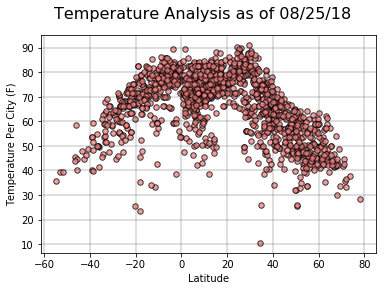

In [9]:
plt.scatter(df["Latitude"], df["Temperature (F)"],
            s=30, label="City", color="lightcoral", edgecolors="black", alpha=.75)

plt.suptitle("Temperature Analysis as of 08/25/18",
             horizontalalignment='center', verticalalignment='top', fontsize=16)

plt.xlabel("Latitude")
plt.ylabel("Temperature Per City (F)")
plt.grid(color='black', linewidth=.25)

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()


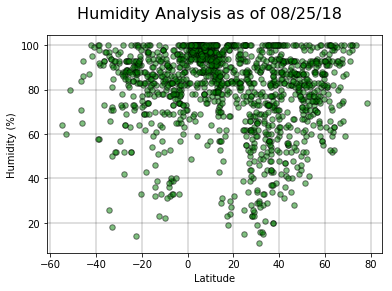

In [10]:
plt.scatter(df["Latitude"],df["Humidity (%)"], s=30,
            label = "City", color = "green", edgecolors="black", alpha = 0.5)

plt.suptitle("Humidity Analysis as of 08/25/18",
             horizontalalignment='center', verticalalignment='top', fontsize=16)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
        
plt.grid(color='black', linewidth=.25)


#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

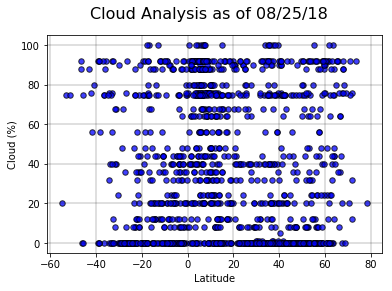

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloud Percentage"], s=30,
            label = "City", color = "blue", edgecolors="black", alpha = 0.75)

plt.suptitle("Cloud Analysis as of 08/25/18",
             horizontalalignment='center', verticalalignment='top', fontsize=16)

plt.xlabel("Latitude")
plt.ylabel("Cloud (%)")
        
plt.grid(color='black', linewidth=.25)

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

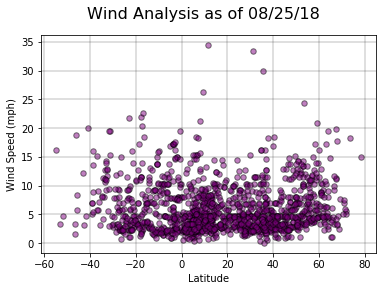

In [12]:

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (mph)"], s=30,
            label = "City", color = "purple", edgecolors="black", alpha = 0.5)

plt.suptitle("Wind Analysis as of 08/25/18",
             horizontalalignment='center', verticalalignment='top', fontsize=16)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
        
plt.grid(color='black', linewidth=.25)

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

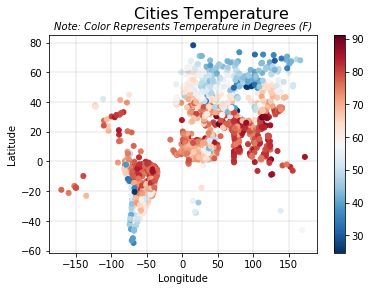

In [13]:
plt.scatter(df["Longitude"],df["Latitude"], s=25,c=ntemp, cmap="RdBu_r",
            vmin=ntemp.max()-ntemp.mean(),vmax=ntemp.max())

plt.suptitle("Cities Temperature",horizontalalignment='center', verticalalignment='top', fontsize=16)
plt.title("Note: Color Represents Temperature in Degrees (F)",fontstyle ='italic', fontsize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(color='black', linewidth=.10)
plt.colorbar()

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

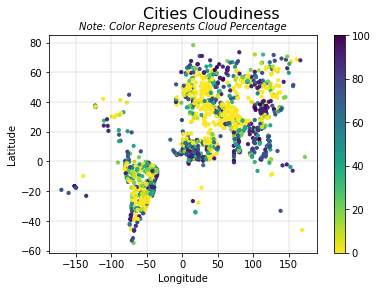

In [14]:
plt.scatter(weather_df["Longitude"],weather_df["Latitude"], s=10,c=ncoud, cmap="viridis_r", vmin=ncoud.min(),vmax=ncoud.max())

plt.suptitle("Cities Cloudiness",horizontalalignment='center', verticalalignment='top', fontsize=16)
plt.title("Note: Color Represents Cloud Percentage",fontstyle ='italic', fontsize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(color='black', linewidth=.10)
plt.colorbar()

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

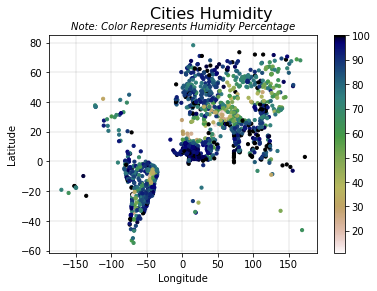

In [15]:
plt.scatter(df["Longitude"],df["Latitude"], s=10,c=nhumid, cmap="gist_earth_r", vmin=nhumid.min(),vmax=nhumid.max())

plt.suptitle("Cities Humidity",horizontalalignment='center', verticalalignment='top', fontsize=16)
plt.title("Note: Color Represents Humidity Percentage",fontstyle ='italic', fontsize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(color='black', linewidth=.10)

plt.colorbar()

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

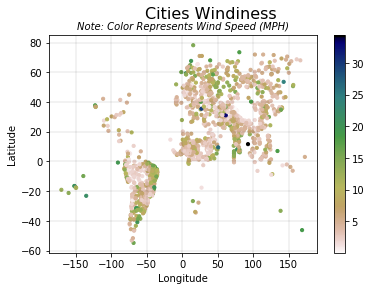

In [16]:
plt.scatter(df["Longitude"],df["Latitude"], s=10,c=nwind, cmap="gist_earth_r", vmin=nwind.min(),vmax=nwind.max())

plt.suptitle("Cities Windiness",horizontalalignment='center', verticalalignment='top', fontsize=16)
plt.title("Note: Color Represents Wind Speed (MPH)",fontstyle ='italic',horizontalalignment='center', fontsize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid(color='black', linewidth=.10)
plt.colorbar()

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()